In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import sys
import shutil   
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Sequential
from keras import optimizers
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import History 
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay,accuracy_score
import keras
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
# from keras.layers import LeakyReLU
# from keras.layers.normalization import batch_normalization
keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, 
                                scale=True, beta_initializer='zeros', gamma_initializer='ones',
                                moving_mean_initializer='zeros', moving_variance_initializer='ones', 
                                beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, 
                                gamma_constraint=None)

import warnings
warnings.filterwarnings('ignore')
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
train = 'c:/Users/jadha/Data/MTP_data_underwater/Train'
val = 'c:/Users/jadha/Data/MTP_data_underwater/Val'
test = 'c:/Users/jadha/Data/MTP_data_underwater/Test'

In [3]:
# Total number of training images
num_of_train_samples = 0
for train_dataset in os.listdir(train):
    in_folder = train + "/" + train_dataset 
    in_folder_list = os.listdir(in_folder)
    num_of_train_samples = num_of_train_samples + len(in_folder_list)
print("Number of Training samples   : ",num_of_train_samples)

# Total number of validation images
num_of_validation_samples = 0
for validation_dataset in os.listdir(val):
    in_folder_val = val + "/" + validation_dataset
    in_folder_val_list = os.listdir(in_folder_val)
    num_of_validation_samples = num_of_validation_samples + len(in_folder_val_list)
print("Number of Validation samples : ", num_of_validation_samples)

# Total number of testing images
num_of_test_samples = 0
for testing_dataset in os.listdir(test):
    in_folder_test = test + "/" + testing_dataset
    in_folder_test_list = os.listdir(in_folder_test)
    num_of_test_samples = num_of_test_samples + len(in_folder_test_list)
print("Number of Test samples : ", num_of_test_samples)

Number of Training samples   :  459
Number of Validation samples :  90
Number of Test samples :  53


In [4]:
for validation_dataset in os.listdir(train):
    print(validation_dataset)

Catla
Mrigal
Rohu
Tilapia
Tuna


In [5]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1. / 255)

test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
batch_size = 16
learning_rate = 0.01
epoch = 100

# Defining image width and height respectively
img_rows = 256
img_cols = 256

In [7]:
train_generator = train_datagen.flow_from_directory(train,
                                                    target_size = (img_rows, img_cols),
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical')

validation_generator = val_datagen.flow_from_directory(val,
                                                        target_size = (img_rows, img_cols),
                                                        batch_size = batch_size,
                                                        shuffle = False, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test,
                                                        target_size = (img_rows, img_cols),
                                                        batch_size = batch_size,
                                                        shuffle = False, class_mode='categorical')

Found 459 images belonging to 5 classes.
Found 90 images belonging to 5 classes.
Found 53 images belonging to 5 classes.


In [8]:
px=train_generator[4][0][7]
px

array([[[0.40784317, 0.37647063, 0.3647059 ],
        [0.40784317, 0.37647063, 0.3647059 ],
        [0.40784317, 0.37647063, 0.3647059 ],
        ...,
        [0.16470589, 0.2509804 , 0.33333334],
        [0.16470589, 0.2509804 , 0.33333334],
        [0.16470589, 0.2509804 , 0.33333334]],

       [[0.40784317, 0.37647063, 0.3647059 ],
        [0.40784317, 0.37647063, 0.3647059 ],
        [0.40784317, 0.37647063, 0.3647059 ],
        ...,
        [0.16470589, 0.2509804 , 0.33333334],
        [0.16470589, 0.2509804 , 0.33333334],
        [0.16470589, 0.2509804 , 0.33333334]],

       [[0.40784317, 0.37647063, 0.3647059 ],
        [0.40784317, 0.37647063, 0.3647059 ],
        [0.40784317, 0.37647063, 0.3647059 ],
        ...,
        [0.16470589, 0.2509804 , 0.33333334],
        [0.16470589, 0.2509804 , 0.33333334],
        [0.16470589, 0.2509804 , 0.33333334]],

       ...,

       [[0.2392157 , 0.29411766, 0.29411766],
        [0.2392157 , 0.29411766, 0.29411766],
        [0.2392157 , 0

In [9]:
steps_per_epoch_vgg16 = num_of_train_samples // batch_size
print("Steps per epoch: ",steps_per_epoch_vgg16)

Steps per epoch:  28


In [10]:

from keras.applications import vgg16
    # The sequential API allows you to create models layer-by-layer
vgg_model=Sequential()
vgg_model.add(vgg16.VGG16(include_top = False, pooling = 'max', weights = 'imagenet'))
vgg_model.add(Dense(5, activation="softmax"))

    # Summary: to find the number of parameters
vgg_model.layers[0].trainable=False
vgg_model.summary() 

adam = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)
vgg_model.compile(loss="categorical_crossentropy",
                  optimizer=adam,
                  metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense (Dense)               (None, 5)                 2565      
                                                                 
Total params: 14,717,253
Trainable params: 2,565
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
# Trains the model for a given number of epochs (iterations on a dataset).
vgg_training = vgg_model.fit_generator(train_generator,
                                       steps_per_epoch = steps_per_epoch_vgg16,
                                       epochs = epoch,
                                       validation_data = validation_generator,
                                       validation_steps = num_of_validation_samples // batch_size)

Epoch 1/100
28/28 [==============================] - 69s 2s/step - loss: 1.5268 - accuracy: 0.3950 - val_loss: 1.4848 - val_accuracy: 0.3750
Epoch 2/100
28/28 [==============================] - 66s 2s/step - loss: 1.1862 - accuracy: 0.4515 - val_loss: 1.1538 - val_accuracy: 0.4875
Epoch 3/100
28/28 [==============================] - 66s 2s/step - loss: 1.0170 - accuracy: 0.5711 - val_loss: 1.2341 - val_accuracy: 0.3875
Epoch 4/100
28/28 [==============================] - 66s 2s/step - loss: 1.0162 - accuracy: 0.5666 - val_loss: 1.2677 - val_accuracy: 0.4125
Epoch 5/100
28/28 [==============================] - 66s 2s/step - loss: 0.9183 - accuracy: 0.5847 - val_loss: 1.0871 - val_accuracy: 0.5250
Epoch 6/100
28/28 [==============================] - 66s 2s/step - loss: 0.8909 - accuracy: 0.6388 - val_loss: 1.4012 - val_accuracy: 0.3875
Epoch 7/100
28/28 [==============================] - 66s 2s/step - loss: 0.9293 - accuracy: 0.5982 - val_loss: 1.0427 - val_accuracy: 0.5375
Epoch 8/100
2

Epoch 59/100
28/28 [==============================] - 72s 3s/step - loss: 0.5127 - accuracy: 0.7788 - val_loss: 0.8614 - val_accuracy: 0.6250
Epoch 60/100
28/28 [==============================] - 67s 2s/step - loss: 0.5117 - accuracy: 0.8059 - val_loss: 0.8889 - val_accuracy: 0.6250
Epoch 61/100
28/28 [==============================] - 69s 2s/step - loss: 0.4698 - accuracy: 0.8217 - val_loss: 0.9608 - val_accuracy: 0.6125
Epoch 62/100
28/28 [==============================] - 70s 3s/step - loss: 0.5307 - accuracy: 0.8014 - val_loss: 0.8861 - val_accuracy: 0.6375
Epoch 63/100
28/28 [==============================] - 70s 3s/step - loss: 0.4872 - accuracy: 0.8014 - val_loss: 0.9042 - val_accuracy: 0.6375
Epoch 64/100
28/28 [==============================] - 70s 3s/step - loss: 0.5173 - accuracy: 0.7991 - val_loss: 0.9914 - val_accuracy: 0.6500
Epoch 65/100
28/28 [==============================] - 67s 2s/step - loss: 0.5074 - accuracy: 0.8104 - val_loss: 0.9036 - val_accuracy: 0.6250
Epoch 

In [12]:
vgg_training.history

{'loss': [1.52682626247406,
  1.18622624874115,
  1.0170143842697144,
  1.016180396080017,
  0.9182984232902527,
  0.8909029364585876,
  0.9292545914649963,
  0.7789535522460938,
  0.831932544708252,
  0.7838551998138428,
  0.762473464012146,
  0.8418228626251221,
  0.7534791827201843,
  0.7542597055435181,
  0.6920174956321716,
  0.6647812724113464,
  0.6939591765403748,
  0.633823812007904,
  0.6822885870933533,
  0.6510453224182129,
  0.6316229104995728,
  0.6806202530860901,
  0.6183350682258606,
  0.5960499048233032,
  0.6089777946472168,
  0.6606245040893555,
  0.5657015442848206,
  0.6092857122421265,
  0.5913650393486023,
  0.5501297116279602,
  0.5859127640724182,
  0.600595235824585,
  0.5712683200836182,
  0.6780960559844971,
  0.5612621903419495,
  0.5620028376579285,
  0.6121242642402649,
  0.5817784070968628,
  0.6257515549659729,
  0.6547677516937256,
  0.6096182465553284,
  0.6221286058425903,
  0.5553762316703796,
  0.5402145385742188,
  0.5512553453445435,
  0.7807593

In [13]:
vgg_model.evaluate(train_generator)

29/29 [==============================] - 95s 3s/step - loss: 0.5581 - accuracy: 0.7778


[0.5581440329551697, 0.7777777910232544]

In [14]:
vgg_model.evaluate(validation_generator)

6/6 [==============================] - 20s 3s/step - loss: 1.1068 - accuracy: 0.6222


[1.1067566871643066, 0.6222222447395325]

In [15]:
vgg_model.evaluate(test_generator)

4/4 [==============================] - 11s 3s/step - loss: 0.8585 - accuracy: 0.6981


[0.8585329651832581, 0.698113203048706]

In [16]:
predictions=vgg_model.predict(test_generator)
predictions

4/4 [==============================] - 12s 3s/step


array([[8.64985287e-01, 1.29748583e-01, 4.76152916e-03, 5.04033349e-04,
        6.43233477e-07],
       [5.73572636e-01, 4.59949160e-06, 1.03114493e-01, 3.23292047e-01,
        1.61250609e-05],
       [6.05715275e-01, 5.21352738e-02, 3.23370337e-01, 1.86110456e-02,
        1.68199840e-04],
       [6.98362350e-01, 1.70814362e-03, 2.29051188e-01, 6.96854442e-02,
        1.19290582e-03],
       [5.75041413e-01, 3.35246958e-02, 3.34046096e-01, 5.72447442e-02,
        1.43161713e-04],
       [8.26655626e-01, 1.57695822e-02, 1.14496738e-01, 4.29592505e-02,
        1.18808843e-04],
       [9.99834418e-01, 4.22293908e-07, 1.06665875e-05, 1.54569949e-04,
        8.95102215e-10],
       [9.99810874e-01, 5.68792814e-07, 8.12110920e-06, 1.77359587e-04,
        3.13935607e-06],
       [9.99955297e-01, 3.01079517e-08, 3.00180159e-06, 2.42151928e-05,
        1.74961078e-05],
       [6.02273524e-01, 1.55193251e-04, 1.32414311e-01, 2.65142739e-01,
        1.42312119e-05],
       [9.99994040e-01, 5.5747

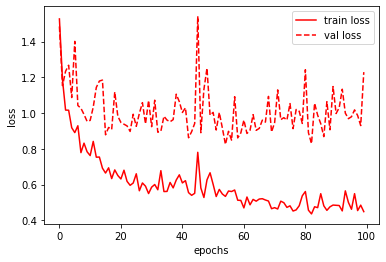

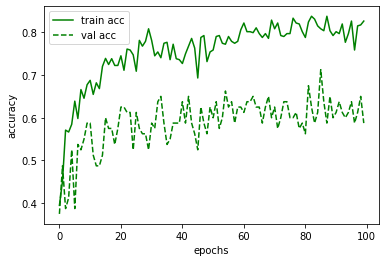

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
plt.plot(vgg_training.history['loss'], label='train loss',color='r')
plt.plot(vgg_training.history['val_loss'], label='val loss',color='r',linestyle='--',)
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(vgg_training.history['accuracy'], label='train acc',color='g')
plt.plot(vgg_training.history['val_accuracy'], label='val acc',color='g',linestyle='--')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
plt.savefig('AccVal_acc')

In [18]:
training_accuracy_vgg      = vgg_training.history['accuracy'][-1]
training_loss_vgg          = vgg_training.history['loss'][-1]
validation_accuracy_vgg    = vgg_training.history['val_accuracy'][-1]
validation_loss_vgg        = vgg_training.history['val_loss'][-1]
print("Training Accuracy VGG    :", training_accuracy_vgg )
print("Training Loss VGG        :", training_loss_vgg)
print("Validation Accuracy VGG  :", validation_accuracy_vgg)
print("Validation Loss VGG      :", validation_loss_vgg)

Training Accuracy VGG    : 0.8261851072311401
Training Loss VGG        : 0.4489242136478424
Validation Accuracy VGG  : 0.5874999761581421
Validation Loss VGG      : 1.2292132377624512


In [19]:
# Generating Confusion Matrix and Classification Report
Y_pred_vgg = vgg_model.predict_generator(test_generator, num_of_validation_samples // batch_size+1)
y_pred_vgg = np.argmax(Y_pred_vgg, axis=1)
print('Confusion Matrix')
conf_matrix_vgg = confusion_matrix(test_generator.classes, y_pred_vgg)
cm_vgg = np.array2string(conf_matrix_vgg)
print(conf_matrix_vgg)
print("=============================================================================================")
print('Classification Report')
target_names = ['Catla','Mrigal','Rohu','Tilapia','Tuna']
class_rep_vgg = classification_report(test_generator.classes, y_pred_vgg, target_names=target_names)
print(class_rep_vgg)

Confusion Matrix
[[11  0  0  0  0]
 [ 5  3  3  1  0]
 [ 6  1  3  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0  8]]
Classification Report
              precision    recall  f1-score   support

       Catla       0.50      1.00      0.67        11
      Mrigal       0.75      0.25      0.38        12
        Rohu       0.50      0.30      0.37        10
     Tilapia       0.92      1.00      0.96        12
        Tuna       1.00      1.00      1.00         8

    accuracy                           0.70        53
   macro avg       0.73      0.71      0.68        53
weighted avg       0.73      0.70      0.66        53



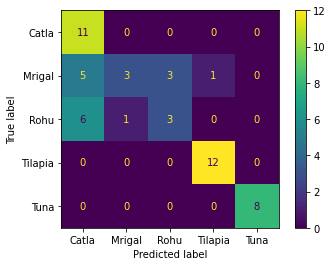

In [20]:
import matplotlib.pyplot as plt
disp=ConfusionMatrixDisplay(conf_matrix_vgg,display_labels=target_names)
disp.plot()
plt.show()